**Name** : Bhargavi Satish Bhende

**Roll no :** RBT21CB053

**Problem Statement :** Email spam or not spam using SVM and Naive Bayes

#**Data Exploration**

In [ ]:
# Import necessary libraries for text preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Importing the dataset

df = pd.read_csv('Spam.csv')

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Inference: The Datset consists of 58 features & 4601 samples.


In [ ]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [ ]:
#Checking number of unique rows in each feature
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0;

#numerical & categorical features
for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 57 numerical & 0 categorical features.


In [ ]:
#Checking the stats of all the columns
display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#**Exploratory Data Analysis**

            Target Variable Distribution           


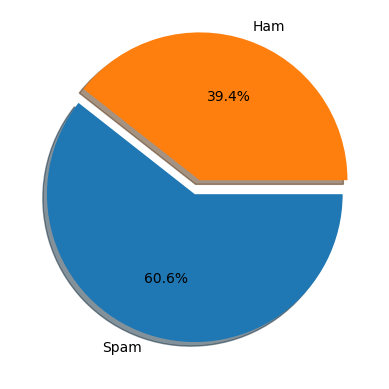

In [ ]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True,
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

#**Data Preprocessing**

In [ ]:
#Removal of any Duplicate rows (if any)
counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 391


In [ ]:
#Check for empty elements
nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                            Total Null Values  Percentage
word_freq_make                              0         0.0
word_freq_857                               0         0.0
word_freq_data                              0         0.0
word_freq_415                               0         0.0
word_freq_85                                0         0.0
word_freq_technology                        0         0.0
word_freq_1999                              0         0.0
word_freq_parts                             0         0.0
word_freq_pm                                0         0.0
word_freq_direct                            0         0.0
word_freq_cs                                0         0.0
word_freq_meeting                           0         0.0
word_freq_original                          0         0.0
word_freq_project                           0         0.0
word_freq_re                                0         0.0
word_freq_edu                               0         0.0
word_freq_tabl

In [ ]:
#Fixing the imbalance using SMOTE Technique

df5 = df1.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
1    2531
0    2531
Name: spam, dtype: int64


##Training and Testing

In [ ]:
#Splitting the data intro training & testing sets

df = df5.copy()
df.columns=[i.replace('[','_') for i in df.columns]

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5062, 57) (5062,) 
Training set  --->  (4049, 57) (4049,) 
Testing set   --->  (1013, 57)  (1013,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,-6.887825e-17,-3.509720e-18,1.000270e-16,3.509720e-18,1.930346e-17,-5.615551e-17,-1.930346e-17,3.509720e-18,-9.125271e-17,-3.509720e-17,...,1.096787e-17,-9.213014e-18,-1.250338e-17,-1.052916e-17,1.140659e-17,-3.772949e-17,-1.930346e-17,1.974217e-17,-3.509720e-18,-4.211664e-17
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.776427e-01,-3.082191e-01,-6.194557e-01,-5.694105e-02,-5.210441e-01,-3.856045e-01,-3.499390e-01,-2.937338e-01,-3.605936e-01,-4.069174e-01,...,-1.085644e-01,-1.634953e-01,-5.153370e-01,-1.849461e-01,-3.758492e-01,-3.538065e-01,-1.056363e-01,-1.421891e-01,-2.842762e-01,-4.778251e-01
25%,-3.776427e-01,-3.082191e-01,-6.194557e-01,-5.694105e-02,-5.210441e-01,-3.856045e-01,-3.499390e-01,-2.937338e-01,-3.605936e-01,-4.069174e-01,...,-1.085644e-01,-1.634953e-01,-5.153370e-01,-1.849461e-01,-3.758492e-01,-3.538065e-01,-1.056363e-01,-1.224371e-01,-2.516288e-01,-4.128333e-01
50%,-3.776427e-01,-3.082191e-01,-6.194557e-01,-5.694105e-02,-5.210441e-01,-3.856045e-01,-3.499390e-01,-2.937338e-01,-3.605936e-01,-4.069174e-01,...,-1.085644e-01,-1.634953e-01,-2.402181e-01,-1.849461e-01,-2.794963e-01,-3.538065e-01,-1.056363e-01,-1.015277e-01,-2.096537e-01,-3.064832e-01
75%,-1.480324e-01,-3.082191e-01,3.653766e-01,-5.694105e-02,1.774358e-01,-2.096976e-01,-2.690629e-01,-2.937338e-01,-3.605936e-01,5.870783e-02,...,-1.085644e-01,-1.634953e-01,1.724603e-01,-1.849461e-01,9.673866e-02,4.674064e-02,-1.056363e-01,-5.640094e-02,-5.108070e-02,-2.436004e-02
max,1.528598e+01,2.477287e+01,9.612521e+00,2.551263e+01,1.400198e+01,2.030104e+01,1.702031e+01,2.594248e+01,1.751928e+01,2.799259e+01,...,3.398934e+01,1.893371e+01,3.574087e+01,3.202943e+01,3.687830e+01,2.285077e+01,4.470907e+01,3.071856e+01,4.629886e+01,2.291920e+01



                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.013293,0.066923,0.008764,-0.051623,-0.015016,-0.010885,-0.016192,-0.020735,-0.066150,0.010382,...,-0.041625,-0.001230,-0.023460,-0.012052,-0.043106,-0.028257,0.060249,0.005904,-0.035699,-0.049715
std,1.044515,1.575062,1.034414,0.055925,0.889842,0.883919,0.946816,0.850784,0.807094,0.941975,...,0.569612,1.090337,0.752429,1.571474,0.639359,0.737202,1.280704,0.952216,0.632370,0.817410
min,-0.377643,-0.308219,-0.619456,-0.056941,-0.521044,-0.385605,-0.349939,-0.293734,-0.360594,-0.406917,...,-0.108564,-0.163495,-0.515337,-0.184946,-0.375849,-0.353807,-0.105636,-0.142189,-0.284276,-0.477825
25%,-0.377643,-0.308219,-0.619456,-0.056941,-0.521044,-0.385605,-0.349939,-0.293734,-0.360594,-0.406917,...,-0.108564,-0.163495,-0.515337,-0.184946,-0.375849,-0.353807,-0.105636,-0.122185,-0.251629,-0.417265
50%,-0.377643,-0.308219,-0.619456,-0.056941,-0.521044,-0.385605,-0.349939,-0.293734,-0.360594,-0.406917,...,-0.108564,-0.163495,-0.262525,-0.184946,-0.284085,-0.353807,-0.105636,-0.101384,-0.209654,-0.319777
75%,-0.213241,-0.308219,0.343554,-0.056941,0.219630,-0.104154,-0.349939,-0.293734,-0.360594,0.014858,...,-0.108564,-0.163495,0.161307,-0.184946,0.053150,0.044340,-0.105636,-0.061822,-0.074400,-0.031745
max,9.179238,37.313420,6.803743,1.083864,8.555843,7.706111,7.104694,8.278496,4.806215,7.809882,...,11.246037,19.012428,8.757497,47.156377,8.315953,7.524076,29.566677,18.517146,5.928052,12.947399


##Importing Libraries for SVM and Naive

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB


#**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create and train a Gaussian Naive Bayes classifier
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(Train_X, Train_Y)  # Use the non-standardized data

# Predict on the test set
gaussian_naive_bayes_predictions = gaussian_naive_bayes.predict(Test_X)

# Evaluate the Gaussian Naive Bayes classifier
gaussian_naive_bayes_accuracy = accuracy_score(Test_Y, gaussian_naive_bayes_predictions)
print("Gaussian Naive Bayes Classifier Accuracy: {:.2f}%".format(gaussian_naive_bayes_accuracy * 100))

# Print classification report
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(Test_Y, gaussian_naive_bayes_predictions))

# Confusion matrix
gaussian_naive_bayes_confusion_matrix = confusion_matrix(Test_Y, gaussian_naive_bayes_predictions)
print("Confusion Matrix for Gaussian Naive Bayes:")
print(gaussian_naive_bayes_confusion_matrix)


Gaussian Naive Bayes Classifier Accuracy: 85.59%
Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       513
           1       0.79      0.97      0.87       500

    accuracy                           0.86      1013
   macro avg       0.88      0.86      0.85      1013
weighted avg       0.88      0.86      0.85      1013

Confusion Matrix for Gaussian Naive Bayes:
[[381 132]
 [ 14 486]]


#**SVM**

In [ ]:
# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try different kernels
svm_classifier.fit(Train_X_std, Train_Y)

# Predict on the test set
svm_predictions = svm_classifier.predict(Test_X_std)

# Evaluate the SVM classifier
svm_accuracy = accuracy_score(Test_Y, svm_predictions)
print("SVM Classifier Accuracy: {:.2f}%".format(svm_accuracy * 100))

# Print classification report
print("Classification Report for SVM:")
print(classification_report(Test_Y, svm_predictions))

# Confusion matrix
svm_confusion_matrix = confusion_matrix(Test_Y, svm_predictions)
print("Confusion Matrix for SVM:")
print(svm_confusion_matrix)


SVM Classifier Accuracy: 93.48%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       513
           1       0.95      0.92      0.93       500

    accuracy                           0.93      1013
   macro avg       0.94      0.93      0.93      1013
weighted avg       0.94      0.93      0.93      1013

Confusion Matrix for SVM:
[[489  24]
 [ 42 458]]
